<a href="https://colab.research.google.com/github/sultanbst123/MachineHack_Genre-Music-Classification/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data modelling with Python

##Library & File

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 23.2 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:

!pip install catboost
!pip install optuna
!pip install borutashap

     |████████████████████████████████| 76.4 MB 38 kB/s 
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 209 kB 49.3 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 144 kB 66.9 MB/s 
     |████████████████████████████████| 111 kB 72.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=8ce8aeb2846e77f398f59c3be7e7a76a180cbc3bb1d20a0629a0d3d5621d1b33
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 371 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDOneClassSVM
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay


import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Genre music classification/train_genre_music(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Genre music classification/test_genre_music(clean).csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Popularity             17996 non-null  float64
 1   danceability           17996 non-null  float64
 2   energy                 17996 non-null  float64
 3   key                    17996 non-null  int64  
 4   loudness               17996 non-null  float64
 5   mode                   17996 non-null  int64  
 6   speechiness            17996 non-null  float64
 7   acousticness           17996 non-null  float64
 8   instrumentalness       17996 non-null  float64
 9   liveness               17996 non-null  float64
 10  valence                17996 non-null  float64
 11  tempo                  17996 non-null  float64
 12  duration_in min/ms     17996 non-null  float64
 13  time_signature         17996 non-null  int64  
 14  Class_Genre            17996 non-null  object 
 15  le

In [ ]:
train.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class_Genre,length_of_artist_name,length_of_track_name,length_words_artist,length_words_track,most_popularity,most_energy,new,new2
0,60.0,0.854,0.564,1,-4.964,1,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0,4,HipHop,10,37,2,7,82.0,0.843,0.709,134.071
1,54.0,0.382,0.814,3,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock,6,12,1,3,79.0,0.814,0.598,116.454
2,35.0,0.434,0.614,6,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Indie Alt,13,18,2,5,50.0,0.854,0.524,147.681
3,66.0,0.853,0.597,10,-6.528,0,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0,4,HipHop,4,26,1,5,66.0,0.713,0.725,107.033
4,53.0,0.167,0.975,2,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock,21,33,4,6,81.0,0.983,0.571,199.060


In [ ]:
def save_ram(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    print(f"After Diet : {round(end_mem, 2)}MB")
    print(f"Reduced: {round(100*(start_mem - end_mem)/(start_mem), 2)}%")

    return df

In [ ]:
train = save_ram(train)
test = save_ram(test)

After Diet : 0.84MB
Reduced: 73.37%
After Diet : 0.29MB
Reduced: 77.27%


## Split data

In [ ]:
tester = test.copy() 

x = train.drop("Class_Genre", axis=1)
y = train.Class_Genre

In [ ]:
cater = x.select_dtypes(exclude="number").columns

In [ ]:
x[cater] = x[cater].astype("category")
tester[cater] = tester[cater].astype("category")

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x, y, test_size=0.2, random_state=1618)

In [ ]:
x_train.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,length_of_artist_name,length_of_track_name,length_words_artist,length_words_track,most_popularity,most_energy,new,new2
13297,53.0,0.343994,0.911133,10,-5.996094,1,0.053986,0.000050,0.001660,0.064209,0.509766,135.2500,320333.000000,4,23,9,3,1,55.0,0.937988,0.627441,135.250000
17216,71.0,0.717773,0.690918,4,-6.441406,1,0.038696,0.015900,0.003910,0.062683,0.551758,100.0000,213107.000000,4,24,14,3,3,71.0,0.716797,0.704590,100.000000
5014,20.0,0.637207,0.612793,8,-7.343750,1,0.074829,0.318115,0.000003,0.111023,0.570801,90.0625,4.400000,4,9,35,1,5,20.0,0.629883,0.625000,2.060547
385,20.0,0.269043,0.154053,9,-18.078125,1,0.038696,0.930176,0.750977,0.109009,0.104004,134.8750,6.858217,4,76,59,12,11,20.0,0.154053,0.211548,4.511719
16199,73.0,0.404053,0.720215,10,-9.179688,0,0.062286,0.000056,0.835938,0.046600,0.475098,121.8750,258467.000000,4,21,27,3,4,75.0,0.875977,0.562012,121.875000


In [ ]:
y.value_counts()

Rock             4949
Indie Alt        2587
Pop              2524
Metal            1854
HipHop           1447
Alt Music        1373
Blues            1272
Acoustic/Folk     625
Instrumental      576
Bollywood         402
Country           387
Name: Class_Genre, dtype: int64

##Test data with LGBM

Test with LGBM

In [ ]:
LG = LGBMClassifier(random_state=18)

In [ ]:
LG.fit(x_train, y_train)

LGBMClassifier(random_state=18)

In [ ]:
print(f"accuracy train: {LG.score(x_train, y_train)}")
print(f"accuracy val: {LG.score(x_val, y_val)}")

accuracy train: 0.777229786051681
accuracy val: 0.5861111111111111


In [ ]:
pred = LG.predict_proba(x_val)

In [ ]:
log_loss(y_val, pred)

1.0935778049172022

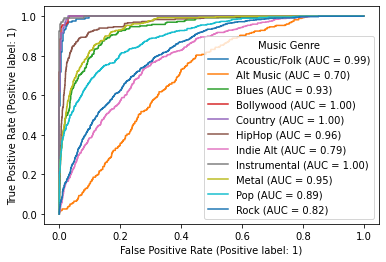

In [ ]:
Label = {}
train_label_ohe = pd.get_dummies(y_train)
val_label_ohe = pd.get_dummies(y_val) 

for i in range(11): # all label
    mdl = LGBMClassifier(random_state=19)
    mdl.fit(x_train,train_label_ohe.iloc[:,i]) 
    #plot 
    ax = plt.gca()
    Label[i] = plot_roc_curve(mdl, x_val, val_label_ohe.iloc[:,i], ax=ax,name=train_label_ohe.iloc[:,i].name)

plt.legend(title="Music Genre")

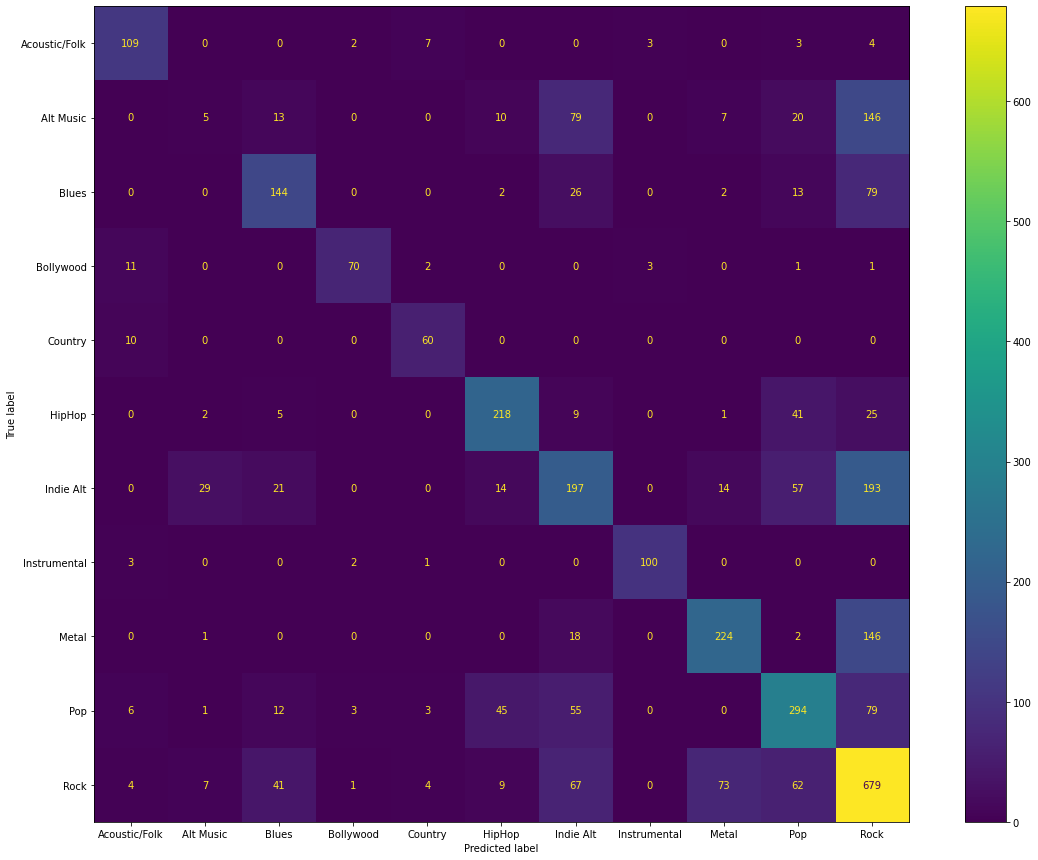

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,15))
plot_confusion_matrix(LG, x_val, y_val,ax=ax)

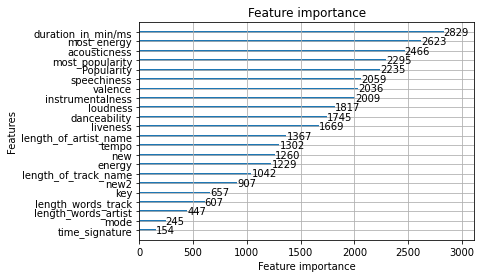

In [ ]:
lightgbm.plot_importance(LG)

In [ ]:
loss = []
acc_train = []
acc_val = []

## Model-1

In [ ]:
x_train_1 = x_train.copy()
x_val_1 = x_val.copy()

In [ ]:
x_train_1.dtypes

Popularity               float16
danceability             float16
energy                   float16
key                         int8
loudness                 float16
mode                        int8
speechiness              float16
acousticness             float16
instrumentalness         float16
liveness                 float16
valence                  float16
tempo                    float16
duration_in min/ms       float32
time_signature              int8
length_of_artist_name      int16
length_of_track_name       int16
length_words_artist         int8
length_words_track          int8
most_popularity          float16
most_energy              float16
new                      float16
new2                     float16
dtype: object

In [ ]:
XGB = XGBClassifier(random_state=10)
GBT = GradientBoostingClassifier(random_state=20)
HGBT = HistGradientBoostingClassifier(random_state=30)
ADA = AdaBoostClassifier(random_state=40)
EXT = ExtraTreeClassifier(random_state=50)
RF = RandomForestClassifier(random_state=60)
DT = DecisionTreeClassifier(random_state=70)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):

    #fit model
    model.fit(x_train,y_train)

    #predict proba
    prob = model.predict_proba(x_val)
    loss.append(log_loss(y_val,prob)) 

    # accuracy train & val
    acc_train.append(model.score(x_train,y_train)) 
    acc_val.append(model.score(x_val,y_val))
    
    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    print(30*"-")
    print(i)
    score_1(i, x_train_1, y_train, x_val_1, y_val)
    print(10*"->" + " DONE")

------------------------------
XGBClassifier(random_state=10)
->->->->->->->->->-> DONE
------------------------------
AdaBoostClassifier(random_state=40)
->->->->->->->->->-> DONE
------------------------------
GradientBoostingClassifier(random_state=20)
->->->->->->->->->-> DONE
------------------------------
HistGradientBoostingClassifier(random_state=30)
->->->->->->->->->-> DONE
------------------------------
DecisionTreeClassifier(random_state=70)
->->->->->->->->->-> DONE
------------------------------
RandomForestClassifier(random_state=60)
->->->->->->->->->-> DONE
------------------------------
ExtraTreeClassifier(random_state=50)
->->->->->->->->->-> DONE


##Model-2

In [ ]:
x_train_2 = x_train.copy() 
x_val_2 = x_val.copy()

In [ ]:
x_train_2.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,length_of_artist_name,length_of_track_name,length_words_artist,length_words_track,most_popularity,most_energy,new,new2
13297,53.0,0.343994,0.911133,10,-5.996094,1,0.053986,0.000050,0.001660,0.064209,0.509766,135.2500,320333.000000,4,23,9,3,1,55.0,0.937988,0.627441,135.250000
17216,71.0,0.717773,0.690918,4,-6.441406,1,0.038696,0.015900,0.003910,0.062683,0.551758,100.0000,213107.000000,4,24,14,3,3,71.0,0.716797,0.704590,100.000000
5014,20.0,0.637207,0.612793,8,-7.343750,1,0.074829,0.318115,0.000003,0.111023,0.570801,90.0625,4.400000,4,9,35,1,5,20.0,0.629883,0.625000,2.060547
385,20.0,0.269043,0.154053,9,-18.078125,1,0.038696,0.930176,0.750977,0.109009,0.104004,134.8750,6.858217,4,76,59,12,11,20.0,0.154053,0.211548,4.511719
16199,73.0,0.404053,0.720215,10,-9.179688,0,0.062286,0.000056,0.835938,0.046600,0.475098,121.8750,258467.000000,4,21,27,3,4,75.0,0.875977,0.562012,121.875000


In [ ]:
CB = CatBoostClassifier(random_state=929)
LGBM = LGBMClassifier(random_state=299)

In [ ]:

def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       model.fit(x_train,y_train,verbose=False)

       #predict proba
       prob = model.predict_proba(x_val)
       loss.append(log_loss(y_val,prob))

       # accuracy train & val
       acc_train.append(model.score(x_train,y_train))
       acc_val.append(model.score(x_val,y_val))
    
   #catboost
    else:         
       model.fit(x_train,y_train,verbose=False)

       #predict proba
       prob = model.predict_proba(x_val)
       loss.append(log_loss(y_val,prob))

       # accuracy train & val
       acc_train.append(model.score(x_train,y_train))
       acc_val.append(model.score(x_val,y_val))
    

    return model

In [ ]:
for i in [CB,LGBM]:
    print(30*"-")
    print(i)
    score_2(i, x_train_2, y_train, x_val_2, y_val)
    print(10*"->" + " DONE")

------------------------------
->->->->->->->->->-> DONE
------------------------------
LGBMClassifier(random_state=299)
->->->->->->->->->-> DONE


## Model-3

In [ ]:
x_train_3 = x_train.copy()
x_val_3 = x_val.copy()

In [ ]:
sc = StandardScaler()
x_train_3 = sc.fit_transform(x_train_3)
x_val_3 = sc.transform(x_val_3)

In [ ]:
LR = LogisticRegression()
#KNN = KNeighborsRegressor()
#SGDC = SGDClassifier(random_state=2828)

In [ ]:
def score_3(model,x_train, y_train, x_val, y_val):

    model.fit(x_train,y_train) 

    # predict proba
    prob = model.predict_proba(x_val)
    loss.append(log_loss(y_val,prob))

    # accuracy train & val
    acc_train.append(model.score(x_train,y_train))
    acc_val.append(model.score(x_val,y_val))
    
    return model

In [ ]:
for i in [LR]:
    print(30*"-")
    print(i)
    score_3(i, x_train_3, y_train, x_val_3, y_val)
    print(10*"->" + " DONE")

------------------------------
LogisticRegression()
->->->->->->->->->-> DONE


## Model-selection

In [ ]:
all_models = pd.DataFrame({"models": ["XGB", "ADA", "GBT", "HGBT", "DT", "RF", "EXT","CB","LGBM","LR"], 
                          "Log_loss": loss, 
                          "Train_accuracy": acc_train,
                          "Val_accuracy": acc_val})
#all_models = all_models.set_index("models")

In [ ]:
all_models

,models,Log_loss,Train_accuracy,Val_accuracy
0,XGB,1.156597,0.615796,0.565278
1,ADA,1.870463,0.402126,0.403056
2,GBT,1.133772,0.657335,0.574444
3,HGBT,1.111064,0.769936,0.581667
4,DT,19.292372,0.921784,0.418889
5,RF,1.456237,0.921784,0.540000
6,EXT,21.853486,0.921784,0.341667
7,CB,1.104484,0.823979,0.574444
8,LGBM,1.094712,0.777716,0.583333
9,LR,1.279637,0.534593,0.513611


Text(0, 0.5, 'Log_loss')

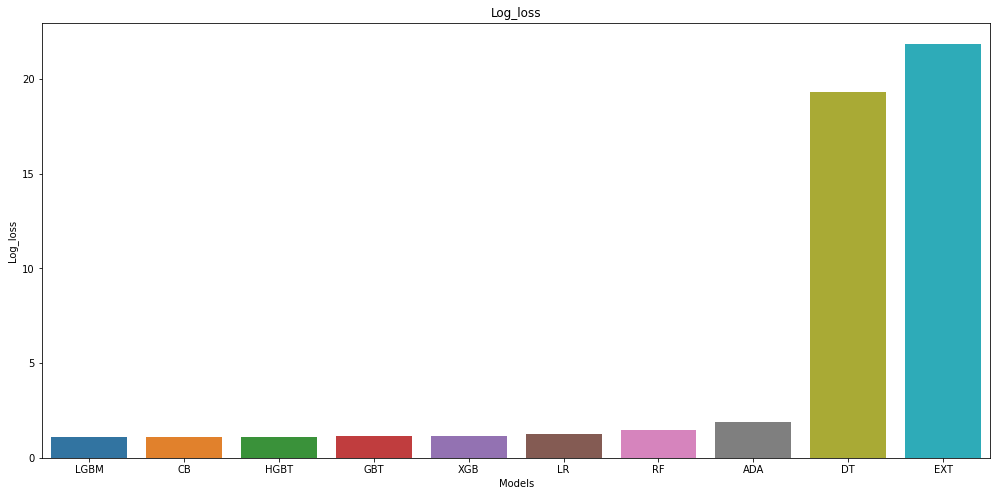

In [ ]:
# plot log_loss

plt.figure(figsize=(17, 8)) 
sns.barplot(x = "models", y="Log_loss", data=all_models.sort_values("Log_loss", ascending=True))
plt.title("Log_loss")
plt.xlabel("Models")
plt.ylabel("Log_loss")

##Hyperparameters - tuning

In [ ]:
#lgbm
def objective(trial):
    params = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        #'objective': trial.suggest_categorical('objective',['multiclass']), 
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1),
    }
    model = LGBMClassifier(**params)  
    model.fit(x_train,y_train,eval_set=[(x_val,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict_proba(x_val)  
    roc = log_loss(y_val, y_preds)

    return roc

In [ ]:
study = optuna.create_study(direction='minimize') #for loss
study.optimize(objective, n_trials=75)

[I 2021-10-26 07:51:25,004] A new study created in memory with name: no-name-4238c3b0-019b-4e28-8ff5-378169b1c5dc
[I 2021-10-26 07:51:25,817] Trial 0 finished with value: 2.136604827384357 and parameters: {'n_estimators': 10000, 'learning_rate': 0.01450885251916211, 'num_leaves': 1200, 'max_depth': 8, 'min_data_in_leaf': 3900, 'lambda_l1': 15, 'lambda_l2': 40, 'min_gain_to_split': 12.584108810423245, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 2.136604827384357.
[I 2021-10-26 07:51:26,657] Trial 1 finished with value: 2.136604827384357 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07384125442201207, 'num_leaves': 1620, 'max_depth': 4, 'min_data_in_leaf': 6300, 'lambda_l1': 5, 'lambda_l2': 45, 'min_gain_to_split': 3.644010353296009, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 2.136604827384357.
[I 2021-10-26 07:51:27,434] Trial 2 finishe

In [ ]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 75
Best trial: {'n_estimators': 10000, 'learning_rate': 0.08179834985372536, 'num_leaves': 160, 'max_depth': 7, 'min_data_in_leaf': 700, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 0.8351071746419583, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}


In [ ]:
lg_params = study.best_trial.params
lg_params

{'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'feature_fraction': 0.5,
 'lambda_l1': 0,
 'lambda_l2': 5,
 'learning_rate': 0.08179834985372536,
 'max_depth': 7,
 'min_data_in_leaf': 700,
 'min_gain_to_split': 0.8351071746419583,
 'n_estimators': 10000,
 'num_leaves': 160}

##Cross-validation

In [ ]:
def cross_val(X, y, model, params, folds=7):

    loss = []
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
 
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,early_stopping_rounds=100)

        pred = alg.predict_proba(x_test)
        log = log_loss(y_test, pred)
        loss.append(log)
     
        print(f" Log_loss: {log}")
        print("-"*50)
     
    print("\nmean log_loss:",np.array(loss).mean())

    return alg

In [ ]:
score_lg = cross_val(x, y, LGBMClassifier, lg_params)

Fold: 1
 Log_loss: 1.1100669655045408
--------------------------------------------------
Fold: 2
 Log_loss: 1.1031464262581097
--------------------------------------------------
Fold: 3
 Log_loss: 1.079215286855158
--------------------------------------------------
Fold: 4
 Log_loss: 1.056136593874037
--------------------------------------------------
Fold: 5
 Log_loss: 1.0953080341978378
--------------------------------------------------
Fold: 6
 Log_loss: 1.1043463714204387
--------------------------------------------------
Fold: 7
 Log_loss: 1.1072018227546203
--------------------------------------------------

mean log_loss: 1.0936316429806774


In [ ]:
# ngetest 

prob = score_lg.predict_proba(x_val)

In [ ]:
log_loss(y_val,prob)

0.9298632781470977

In [ ]:
print(f"accuracy train: {score_lg.score(x_train, y_train)}")
print(f"accuracy val: {score_lg.score(x_val, y_val)}")

accuracy train: 0.650805779383162
accuracy val: 0.66


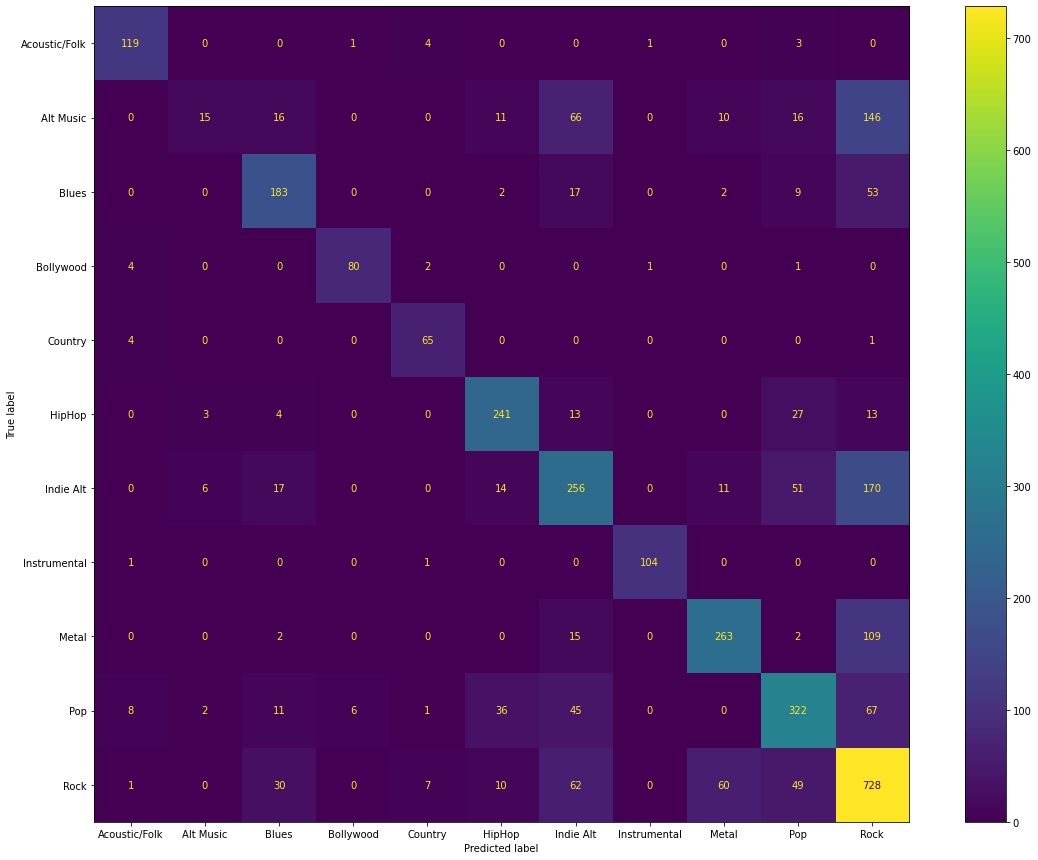

In [ ]:

fig, ax = plt.subplots(1, 1,figsize=(20,15)) 

plot_confusion_matrix(score_lg, x_val, y_val,ax=ax)

In [ ]:
classification_report(y_val, score_lg.predict(x_val))

'               precision    recall  f1-score   support\n\nAcoustic/Folk       0.87      0.93      0.90       128\n    Alt Music       0.58      0.05      0.10       280\n        Blues       0.70      0.69      0.69       266\n    Bollywood       0.92      0.91      0.91        88\n      Country       0.81      0.93      0.87        70\n       HipHop       0.77      0.80      0.78       301\n    Indie Alt       0.54      0.49      0.51       525\n Instrumental       0.98      0.98      0.98       106\n        Metal       0.76      0.67      0.71       391\n          Pop       0.67      0.65      0.66       498\n         Rock       0.57      0.77      0.65       947\n\n     accuracy                           0.66      3600\n    macro avg       0.74      0.72      0.71      3600\n weighted avg       0.66      0.66      0.64      3600\n'

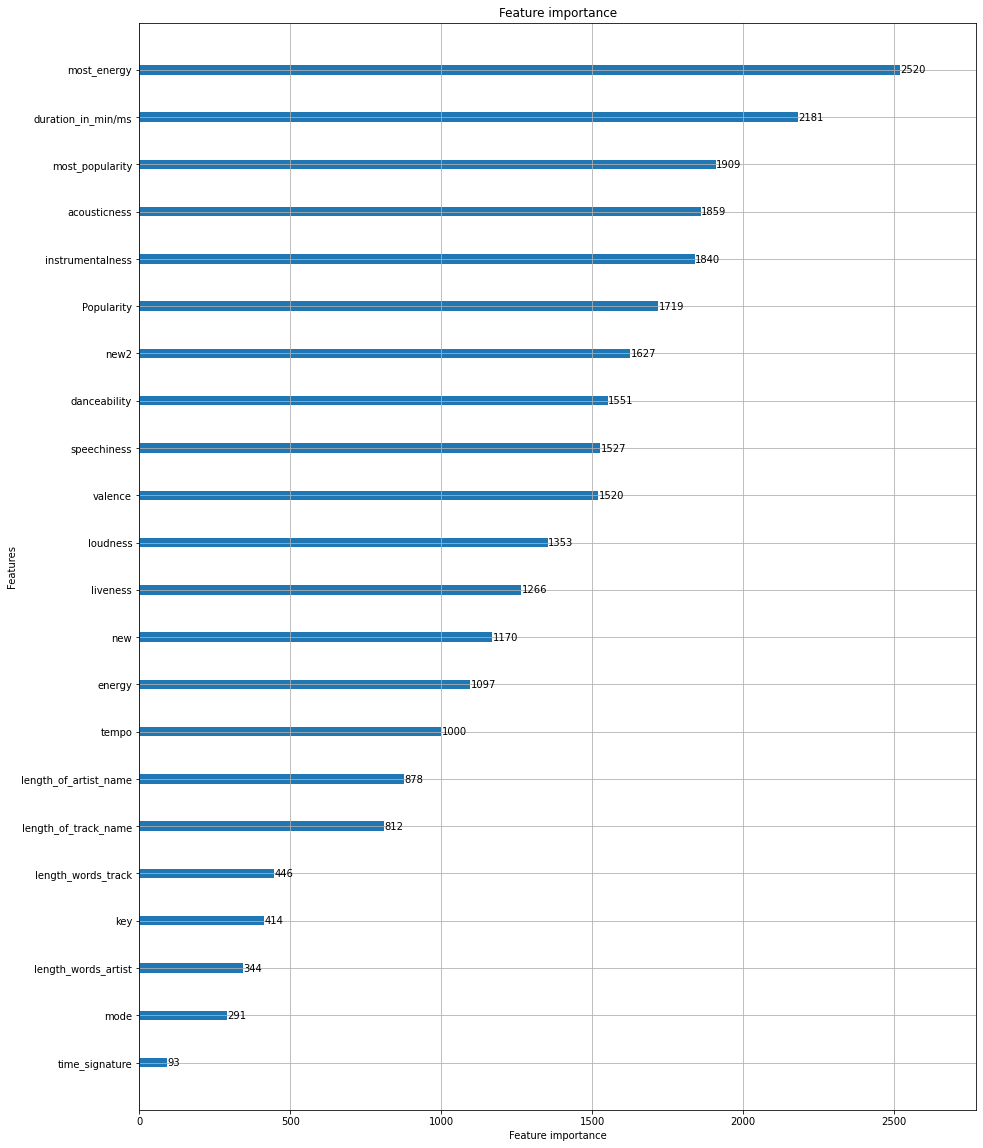

In [ ]:
# plot_feature_importance
fig, ax = plt.subplots(1, 1,figsize=(15, 20))

lightgbm.plot_importance(score_lg, ax=ax)

 make a Subsmisism

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Genre music classification/submission.csv")

In [ ]:
sub

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7708,0,0,0,0,0,0,0,0,0,0,0
7709,0,0,0,0,0,0,0,0,0,0,0
7710,0,0,0,0,0,0,0,0,0,0,0
7711,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# predict test 

y_test = score_lg.predict(tester)

In [ ]:
new_sub = pd.get_dummies(y_test)
new_sub

,Acoustic/Folk,Alt Music,Blues,Bollywood,Country,HipHop,Indie Alt,Instrumental,Metal,Pop,Rock
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7708,0,0,0,0,0,0,0,0,0,1,0
7709,0,0,0,0,0,0,0,0,0,0,1
7710,0,0,0,0,0,0,0,0,0,1,0
7711,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
new_sub.to_csv("my_subs.csv", index=False)